In [2]:
import pandas as pd

# Load the dataset
url = '/content/Mall_Customers.csv'
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Implementing K-Means Clustering on Customer Segments
Task: Apply K-Means clustering to the Mall Customers dataset to segment customers based on their annual income and spending score. Visualize the resulting clusters.**


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


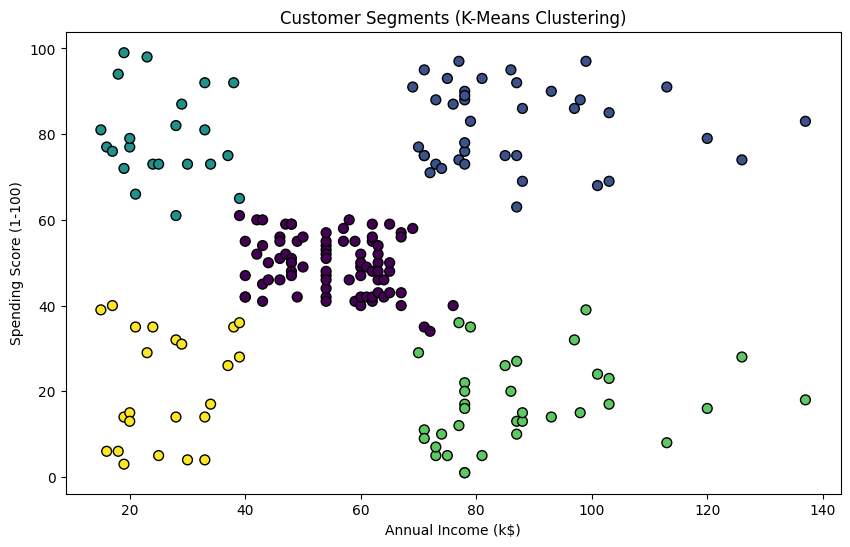

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Extract features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (K-Means Clustering)')
plt.show()


**Optimal Number of Clusters: Elbow Method and Silhouette Score
Task: Use the Elbow Method and Silhouette Score to find the optimal number of clusters for the Mall Customers dataset. Discuss the criteria for selecting the number of clusters.**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

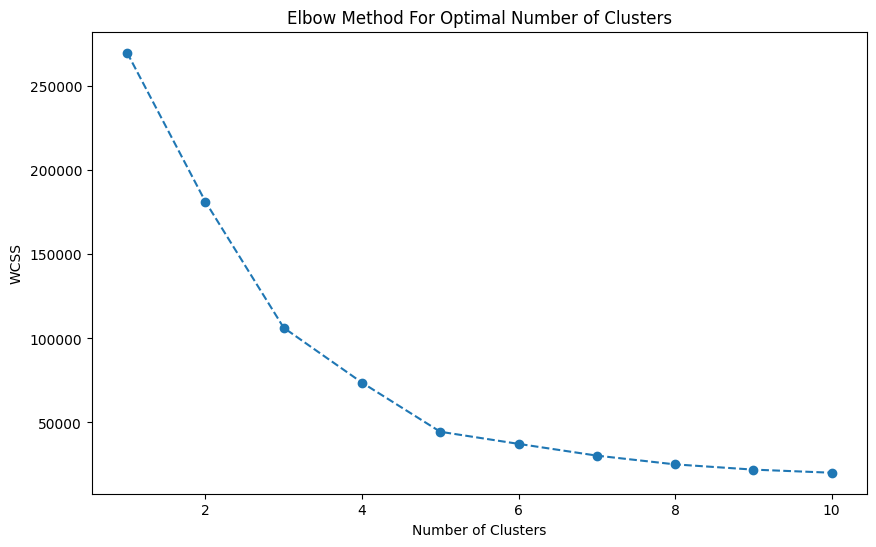

In [4]:
# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

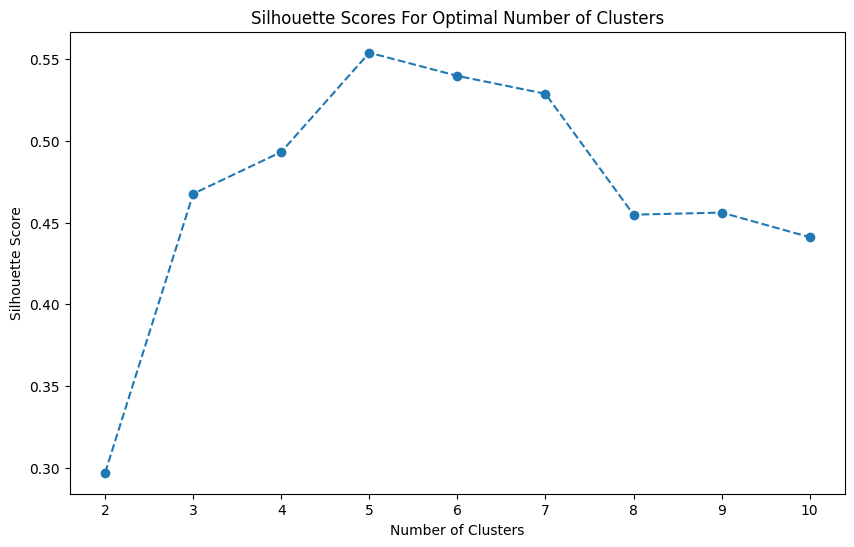

In [5]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette scores for different numbers of clusters
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Optimal Number of Clusters')
plt.show()


**Cluster Profiling and Insights
Task: Analyze the characteristics of the clusters formed in the Mall Customers dataset. Provide insights into the customer segments based on their spending behavior and income levels.**

In [8]:
# Analyze the characteristics of each cluster
cluster_profiles = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean() # Calculate mean for numerical columns
cluster_profiles['Count'] = df['Cluster'].value_counts()
cluster_profiles

,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,
0,55.296296,49.518519,81
1,86.538462,82.128205,39
2,25.727273,79.363636,22
3,88.200000,17.114286,35
4,26.304348,20.913043,23


**Task: Implement hierarchical clustering on the Mall Customers dataset. Compare the clusters formed with those obtained from K-Means and discuss the differences.**

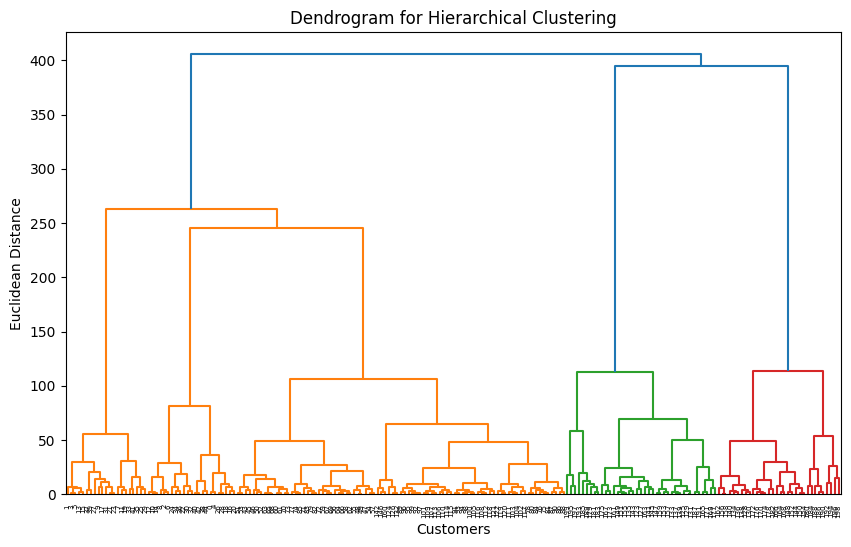

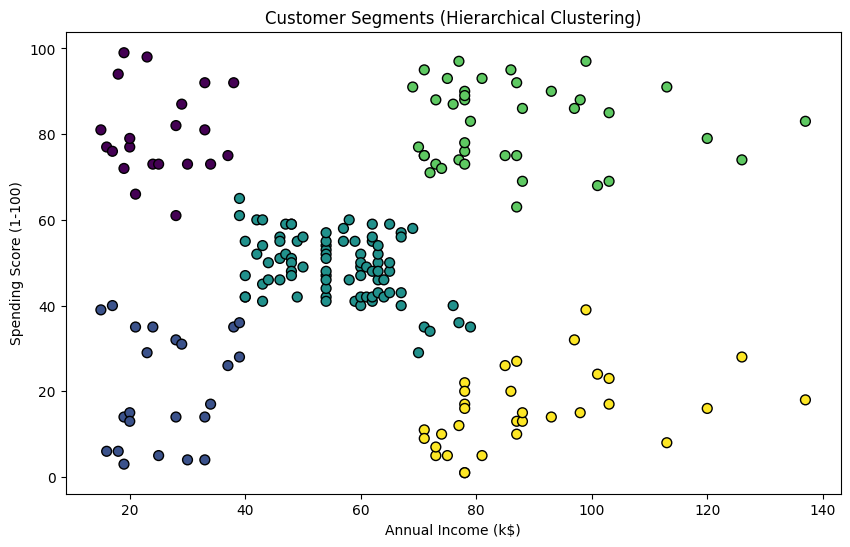

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

# Perform hierarchical clustering
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.title('Dendrogram for Hierarchical Clustering')
plt.show()

# Create cluster labels
df['HCluster'] = fcluster(Z, t=5, criterion='maxclust')

# Visualize the hierarchical clusters
plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=df['HCluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segments (Hierarchical Clustering)')
plt.show()


**Task: Apply PCA to the Mall Customers dataset to reduce its dimensionality. Visualize the clusters from both K-Means and hierarchical clustering in the PCA-reduced space.**

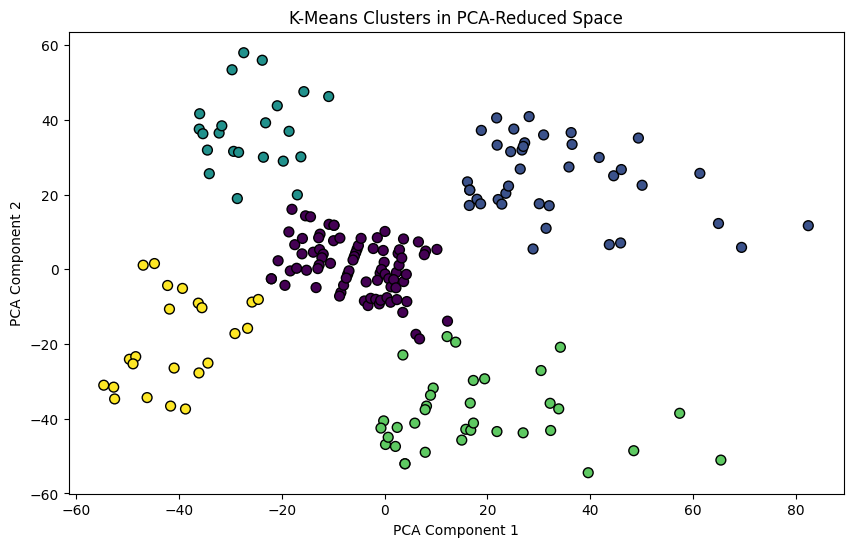

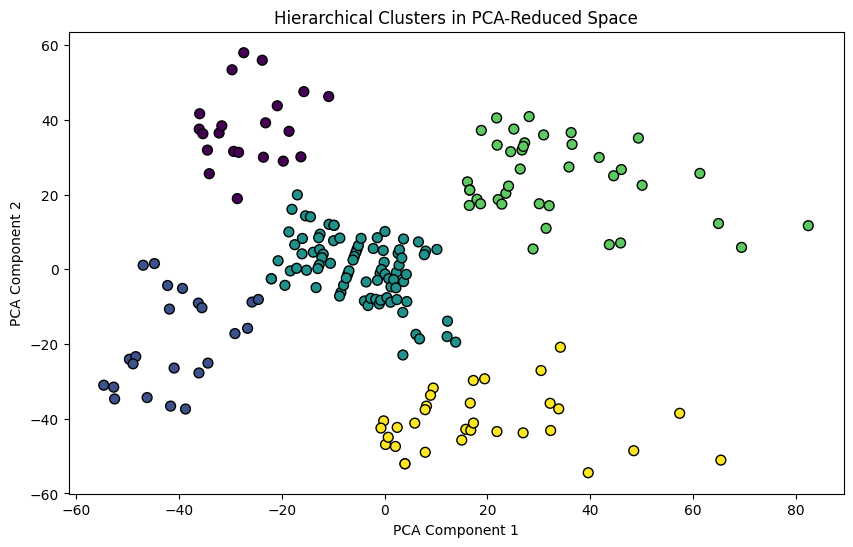

In [10]:
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize K-Means clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clusters in PCA-Reduced Space')
plt.show()

# Visualize Hierarchical clusters in PCA-reduced space
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['HCluster'], cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Hierarchical Clusters in PCA-Reduced Space')
plt.show()
